# Introducing Keras

Be sure to "pip install keras" first!

Keras is a layer on top of TensorFlow that makes things a lot easier. Not only is it easier to use, it's easier to tune.

Let's set up the same deep neural network we set up with TensorFlow to learn from the MNIST data set.

First we'll import all the stuff we need, which will initialize Keras as a side effect:

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

/Users/christyhe/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [64]:
mnist_train_images.shape

(60000, 28, 28)

In [65]:
mnist_test_images.shape

(10000, 28, 28)

In [66]:
mnist_train_images.argmax()

161

In [67]:
mnist_train_labels.itemsize

1

In [45]:
mnist_test_images.argmax()

355

In [9]:
mnist_test_labels.itemsize

1

We'll load up the MNIST data set. In Keras, it's a little bit different - there are 60K training samples and 10K test samples. No "validation" samples.

We need to explicitly convert the data into the format Keras / TensorFlow expects. We divide the image data by 255 in order to normalize it into 0-1 range, after converting it into floating point values.

In [46]:
train_images = mnist_train_images.reshape(60000, 784).astype('float32')/255
test_images = mnist_test_images.reshape(10000, 784).astype('float32')/255

In [21]:
train_images.shape

(60000, 784)

In [20]:
test_images.shape

(10000, 784)

In [4]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Now we'll convert the 0-9 labels into "one-hot" format, as we did for TensorFlow.

In [69]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
train_labels.shape

(60000, 10)

In [70]:
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)
test_labels.shape

(10000, 10)

In [5]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Let's take a peek at one of the training images just to make sure it looks OK:

In [17]:
#display the samples
import matplotlib.pyplot as plt

def display_sample(num):
    
    #Print the one-hot array of this sample's label
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28*28 image
    image = train_images[num].reshape([28, 28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


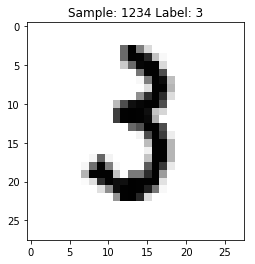

In [28]:
display_sample(1234)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


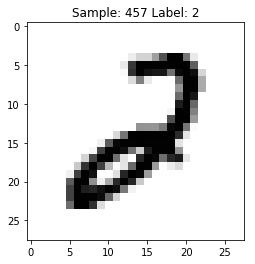

In [29]:
display_sample(457)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


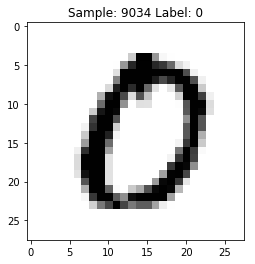

In [72]:
display_sample(9034)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


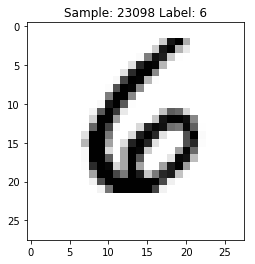

In [31]:
display_sample(23098)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


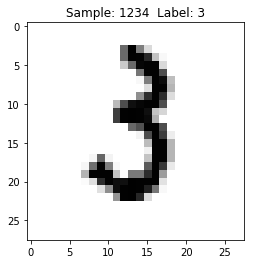

In [57]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax()
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

Here's where things get exciting. All that code we wrote in Tensorflow creating placeholders, variables, and defining a bunch of linear algebra for each layer in our neural network? None of that is necessary with Keras!

We can set up the same layers like this. The input layer of 784 features feeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied. Couldn't be simpler:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [6]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [19]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


We can even get a nice description of the resulting model:

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Setting up our optimizer and loss function is just as simple. We will use the RMSProp optimizer here. Other choices include Adagrad, SGD, Adam, Adamax, and Nadam. See https://keras.io/optimizers/

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Training our model is also just one line of code with Keras. Here we'll do 10 epochs with a batch size of 100. Keras is slower, and if we're not running on top of a GPU-accelerated Tensorflow this can take a fair amount of time (that's why I've limited it to just 10 epochs.)

In [21]:
history = model.fit(train_images, train_labels,
                   batch_size=100,
                   epochs=10,
                   verbose=2,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2320 - acc: 0.9287 - val_loss: 0.1107 - val_acc: 0.9654
Epoch 2/10
 - 5s - loss: 0.1025 - acc: 0.9691 - val_loss: 0.0897 - val_acc: 0.9725
Epoch 3/10
 - 5s - loss: 0.0771 - acc: 0.9770 - val_loss: 0.1080 - val_acc: 0.9704
Epoch 4/10
 - 5s - loss: 0.0637 - acc: 0.9814 - val_loss: 0.0871 - val_acc: 0.9779
Epoch 5/10
 - 5s - loss: 0.0549 - acc: 0.9849 - val_loss: 0.0881 - val_acc: 0.9780
Epoch 6/10
 - 5s - loss: 0.0491 - acc: 0.9859 - val_loss: 0.0742 - val_acc: 0.9814
Epoch 7/10
 - 5s - loss: 0.0421 - acc: 0.9880 - val_loss: 0.0908 - val_acc: 0.9782
Epoch 8/10
 - 5s - loss: 0.0373 - acc: 0.9893 - val_loss: 0.0877 - val_acc: 0.9803
Epoch 9/10
 - 5s - loss: 0.0374 - acc: 0.9895 - val_loss: 0.0908 - val_acc: 0.9808
Epoch 10/10
 - 5s - loss: 0.0340 - acc: 0.9906 - val_loss: 0.0962 - val_acc: 0.9816


In [10]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2460 - acc: 0.9276 - val_loss: 0.1199 - val_acc: 0.9664
Epoch 2/10
 - 3s - loss: 0.1000 - acc: 0.9702 - val_loss: 0.0873 - val_acc: 0.9744
Epoch 3/10
 - 4s - loss: 0.0665 - acc: 0.9804 - val_loss: 0.0744 - val_acc: 0.9779
Epoch 4/10
 - 4s - loss: 0.0489 - acc: 0.9855 - val_loss: 0.0715 - val_acc: 0.9797
Epoch 5/10
 - 4s - loss: 0.0374 - acc: 0.9887 - val_loss: 0.0696 - val_acc: 0.9805
Epoch 6/10
 - 3s - loss: 0.0284 - acc: 0.9915 - val_loss: 0.0658 - val_acc: 0.9811
Epoch 7/10
 - 3s - loss: 0.0228 - acc: 0.9931 - val_loss: 0.0666 - val_acc: 0.9808
Epoch 8/10
 - 3s - loss: 0.0170 - acc: 0.9949 - val_loss: 0.0619 - val_acc: 0.9846
Epoch 9/10
 - 3s - loss: 0.0133 - acc: 0.9964 - val_loss: 0.0858 - val_acc: 0.9781
Epoch 10/10
 - 3s - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0707 - val_acc: 0.9833


But, even with just 10 epochs, we've outperformed our Tensorflow version considerably!

In [22]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.09616588856903413
Test accuracy:  0.9816


score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

As before let's visualize the ones it got wrong. As this model is much better, we'll have to search deeper to find mistakes to look at.

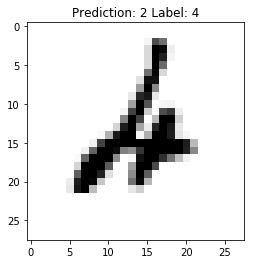

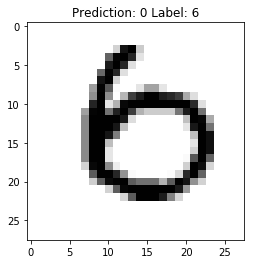

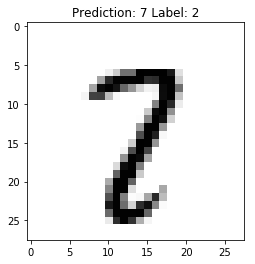

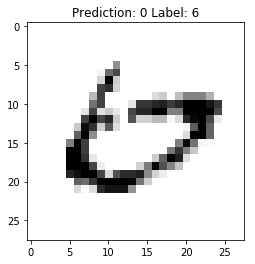

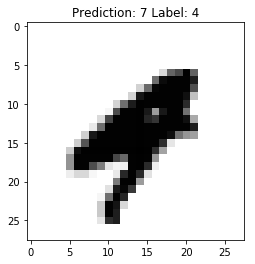

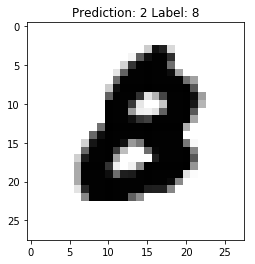

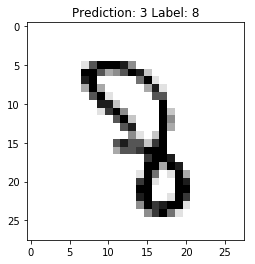

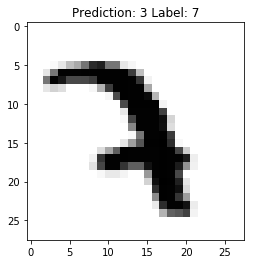

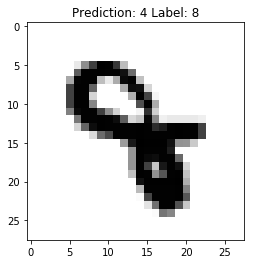

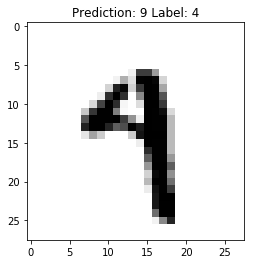

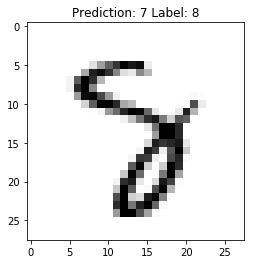

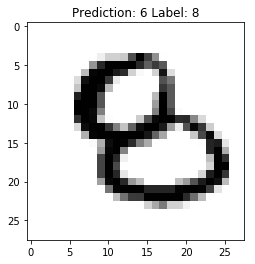

In [23]:
for x in range(1000):
    test_image = test_images[x, :].reshape(1, 784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

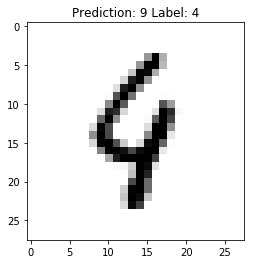

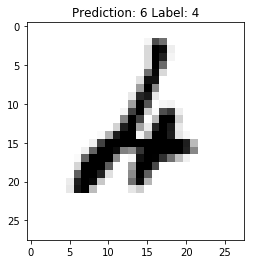

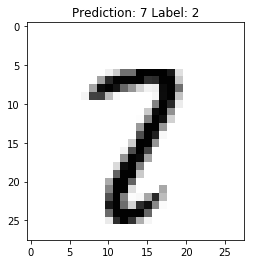

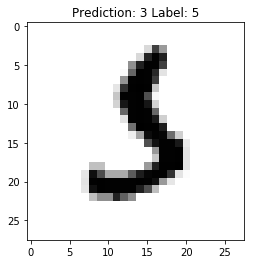

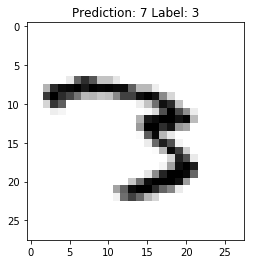

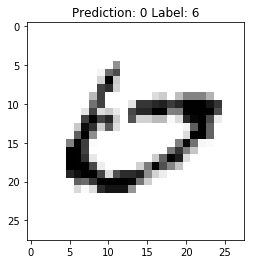

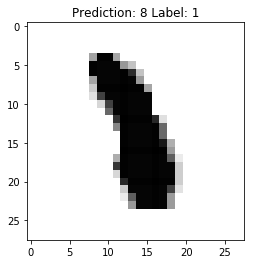

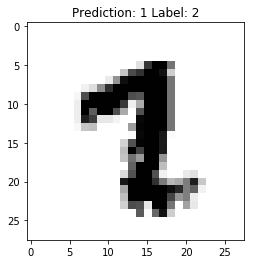

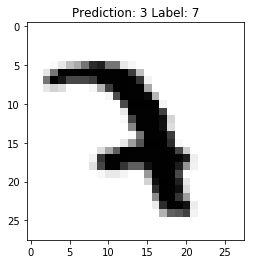

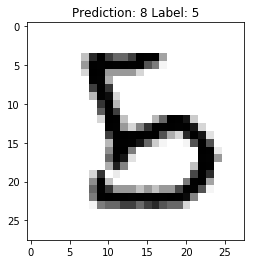

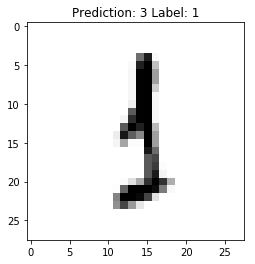

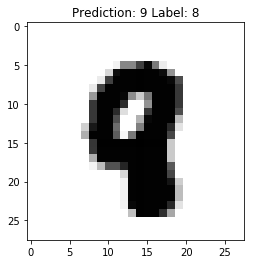

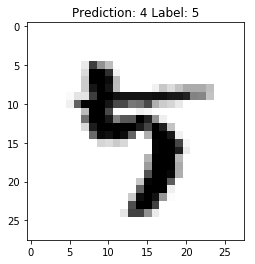

In [11]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

You can see most of the ones it's having trouble with, are images a human would have trouble with as well!

## Excercise

As before, see if you can improve on the results! Does running more epochs help considerably? How about trying different optimizers?

You can also take advantage of Keras's ease of use to try different topologies quickly. Keras includes a MNIST example, where they add an additional layer, and use Dropout at each step to prevent overfitting, like this:

`
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
`

Try adapting that to our code above and see if it makes a difference or not.